## Import Dependencies

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import imghdr

C:\Users\mikey\AppData\Local\Temp\ipykernel_18896\4218688581.py:8: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


## Import CSV Dataset

In [2]:
dataset = pd.read_csv('./data/Brain Tumor.csv')

In [3]:
dataset.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


## Import Brain Scan Images

In [4]:
all_images_dir = './data/Brain Tumor/Brain Tumor/'

In [5]:
os.listdir(all_images_dir)

['Image1.jpg',
 'Image10.jpg',
 'Image100.jpg',
 'Image1000.jpg',
 'Image1001.jpg',
 'Image1002.jpg',
 'Image1003.jpg',
 'Image1004.jpg',
 'Image1005.jpg',
 'Image1006.jpg',
 'Image1007.jpg',
 'Image1008.jpg',
 'Image1009.jpg',
 'Image101.jpg',
 'Image1010.jpg',
 'Image1011.jpg',
 'Image1012.jpg',
 'Image1013.jpg',
 'Image1014.jpg',
 'Image1015.jpg',
 'Image1016.jpg',
 'Image1017.jpg',
 'Image1018.jpg',
 'Image1019.jpg',
 'Image102.jpg',
 'Image1020.jpg',
 'Image1021.jpg',
 'Image1022.jpg',
 'Image1023.jpg',
 'Image1024.jpg',
 'Image1025.jpg',
 'Image1026.jpg',
 'Image1027.jpg',
 'Image1028.jpg',
 'Image1029.jpg',
 'Image103.jpg',
 'Image1030.jpg',
 'Image1031.jpg',
 'Image1032.jpg',
 'Image1033.jpg',
 'Image1034.jpg',
 'Image1035.jpg',
 'Image1036.jpg',
 'Image1037.jpg',
 'Image1038.jpg',
 'Image1039.jpg',
 'Image104.jpg',
 'Image1040.jpg',
 'Image1041.jpg',
 'Image1042.jpg',
 'Image1043.jpg',
 'Image1044.jpg',
 'Image1045.jpg',
 'Image1046.jpg',
 'Image1047.jpg',
 'Image1048.jpg',
 '

In [6]:
example_scan = cv2.imread(os.path.join(all_images_dir, 'Image3.jpg'))

In [7]:
example_scan.shape

(240, 240, 3)

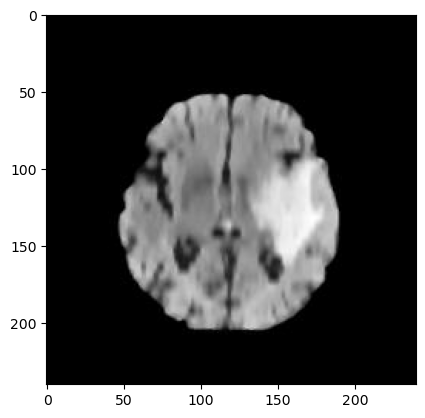

In [8]:
plt.imshow(example_scan)

## Load Data

In [9]:
import shutil

In [10]:
training_images_dir = './data/Brain Tumor/training'

In [11]:
image_dataset = tf.keras.utils.image_dataset_from_directory(training_images_dir)

Found 1683 files belonging to 2 classes.


In [12]:
image_dataset_iterator = image_dataset.as_numpy_iterator()

In [13]:
images_and_class = dataset[['Image', 'Class']]
images_and_class.head()

,Image,Class
0,Image1,0
1,Image2,0
2,Image3,1
3,Image4,1
4,Image5,0


In [14]:
positive_images_names_with_classes = images_and_class[images_and_class['Class'] == 1]

In [15]:
negative_images_names_with_classes = images_and_class[images_and_class['Class'] == 0]

In [16]:
positive_images_names = positive_images_names_with_classes.pop('Image')

In [17]:
negative_images_names = negative_images_names_with_classes.pop('Image')

### Move negative and positive images to respective folders

#### Move positive images

In [22]:
positive_image_dir = './data/Brain Tumor/training/positive'
for positive_image in positive_images_names:
    positive_image_source_file = all_images_dir + positive_image + '.jpg' 
    shutil.copy(positive_image_source_file, positive_image_dir)
    print(positive_image_source_file + " copied to: " + positive_image_dir)

./data/Brain Tumor/Brain Tumor/Image3.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image4.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image10.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image11.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image12.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image13.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image16.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image17.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image26.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image32.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image33.jpg copied to: ./data/Brain Tumor/training/positive
.

#### Move negative images

In [21]:
negative_image_dir = './data/Brain Tumor/training/negative'
for negative_image in negative_images_names:
    negative_image_source_file = all_images_dir + negative_image + '.jpg' 
    shutil.copy(negative_image_source_file, negative_image_dir)
    print(negative_image_source_file + " copied to: " + negative_image_dir)

./data/Brain Tumor/Brain Tumor/Image1.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image2.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image5.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image6.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image7.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image8.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image9.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image14.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image15.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image18.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image19.jpg copied to: ./data/Brain Tumor/training/negative
./data

### Create Image Dataset

In [105]:
dataset = tf.keras.utils.image_dataset_from_directory('./data/Brain Tumor/training/', shuffle=False)

Found 1683 files belonging to 2 classes.


In [106]:
for elem in dataset.take(1):
  print (elem)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],




In [107]:
data_iterator = dataset.as_numpy_iterator()

In [108]:
batch = data_iterator.next()

### Preprocess data

In [109]:
data = dataset.map(lambda x, y: (x/255, y))

In [110]:
scaled_iterator = data.as_numpy_iterator()

In [111]:
batch = scaled_iterator.next()

In [112]:
batch[0].max()

1.0

In [113]:
len(data)

53

In [114]:
train_size = int(len(data)*.7)
validation_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [115]:
train = data.take(train_size)
val = data.skip(train_size).take(validation_size)
test = data.skip(train_size+validation_size).take(test_size)

In [116]:
for (img, label) in train:
    print(img.numpy(), label.numpy())
    break

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0

In [117]:
for (img, label) in train:
    print(tf.cast(img, tf.float32) / 255.0, label)
    break

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

# Model

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [119]:
model = Sequential()

In [120]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [121]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [122]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

## Training

In [123]:
logdir = 'logs'

In [124]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [125]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
37/37 [==============================] - 15s 377ms/step - loss: 0.0209 - accuracy: 0.9992 - val_loss: 2.6284e-16 - val_accuracy: 1.0000
Epoch 2/20
 7/37 [====>.........................] - ETA: 11s - loss: 2.9969e-27 - accuracy: 1.0000

KeyboardInterrupt: 

In [93]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Plot Performance

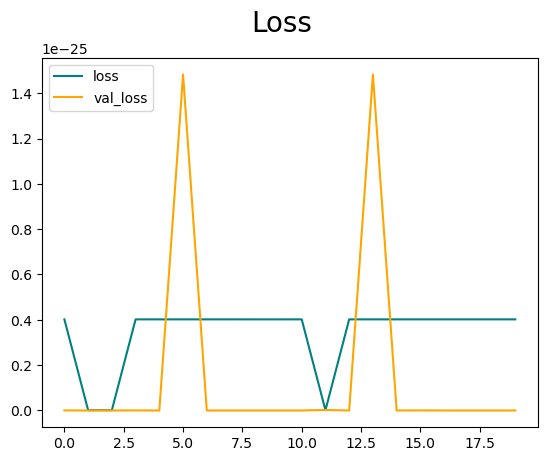

In [94]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

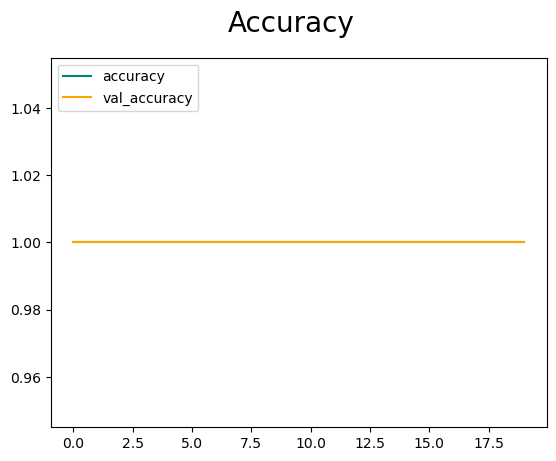

In [95]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

In [96]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [97]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [98]:
len(test)

5

In [99]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 70ms/step


In [100]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0
